In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from scipy import stats
from whats_your_bench import conjugate_priors as cp
import matplotlib.pyplot as plt
import arviz as az
import numpy as np

# One dimension

In [3]:
data = stats.norm.rvs(10, 30, 1000)

data.shape

(1000,)

In [10]:
normal_with_var = cp.NormalKnownVar(30, [0, 1], data)

print(normal_with_var.prior_params)
print(normal_with_var.posterior_params)
print(normal_with_var.posterior_predictive_params)

mean, sigma = normal_with_var.posterior_predictive_params["mean"], normal_with_var.posterior_predictive_params["variance"]

{'mean': 0, 'variance': 1}
{'mean': 9.596436914898993, 'variance': 0.029126213592233007}
{'mean': 9.596436914898993, 'variance': 30.02912621359223}


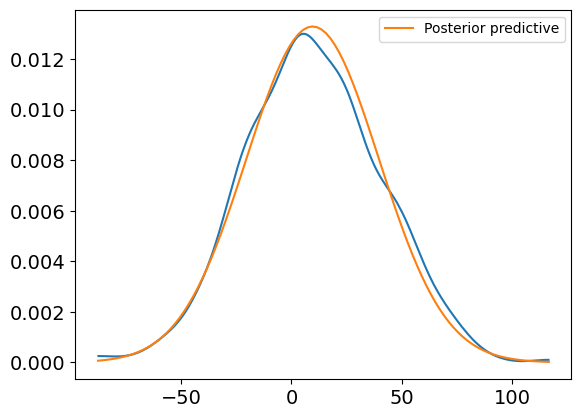

In [ ]:
fig, ax = plt.subplots()

az.plot_kde(data, ax = ax)
x = np.linspace(data.min(), data.max(), 100)
ax.plot(x, stats.norm.pdf(x, mean, sigma), color = "C1", label = "Posterior predictive")
ax.legend()
plt.show();

In [4]:
normal_with_mean = cp.NormalKnownMean(5, [0, 1], data)

print(normal_with_mean.prior_params)
print(normal_with_mean.posterior_params)
print(normal_with_mean.posterior_predictive_params)

df = normal_with_mean.posterior_predictive_params["k"]
loc = normal_with_mean.posterior_predictive_params["loc"]
scale = normal_with_mean.posterior_predictive_params["scale"]

{'alpha': 0, 'beta': 1}
{'alpha': 500.0, 'beta': 481510.18653784785}
{'k': 500.0, 'loc': 5, 'scale': 31.03256955322417}


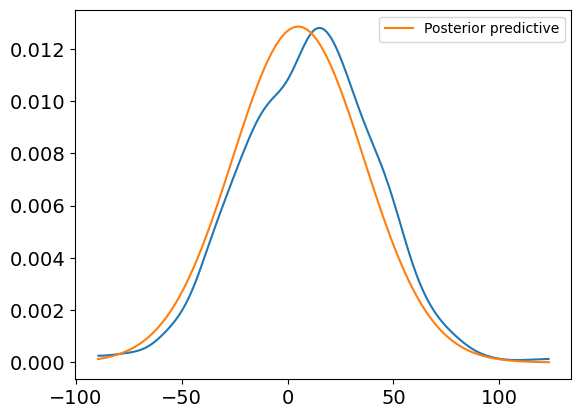

In [5]:
fig, ax = plt.subplots()

az.plot_kde(data, ax = ax)
x = np.linspace(data.min(), data.max(), 100)
ax.plot(x, stats.t.pdf(x, df, loc, scale), color = "C1", label = "Posterior predictive")
ax.legend()
plt.show();

# Multi-dimensional

In [3]:
mv_data = stats.norm.rvs(5, 3, size = (1000, 2))

In [4]:
mv_normal_known_cov = cp.MvNormalKnownCov(
    np.array([[1, 0.5], [0.5, 1]]),
    [
        [0, 0],
        np.array([[1, 0], [0, 1]])
    ],
    mv_data
)

prior_mean, prior_cov = [
        [0, 0],
        np.array([[1, 0], [0, 1]])
    ]
post_mean, post_cov = mv_normal_known_cov.posterior_predictive_params["mean"], mv_normal_known_cov.posterior_predictive_params["covariance"]

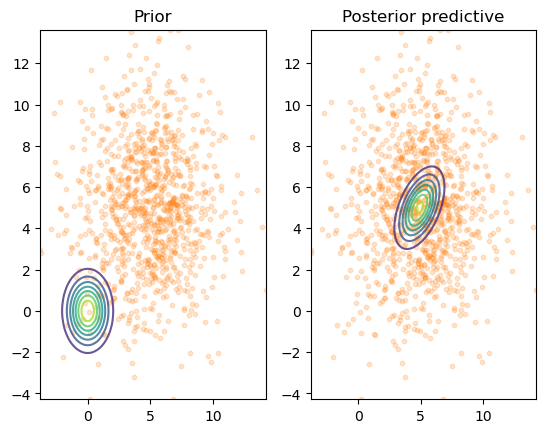

In [5]:
fig, ax = plt.subplots(ncols = 2)

z1 = np.linspace(mv_data[:, 0].min(), mv_data[:, 0].max(), 100)
z2 = np.linspace(mv_data[:, 1].min(), mv_data[:, 1].max(), 100)
x, y = np.meshgrid(z1, z2)
pos = np.dstack((x, y))

ax[0].contour(x, y, stats.multivariate_normal.pdf(pos, mean = prior_mean, cov = prior_cov), alpha = 0.8)
ax[1].contour(x, y, stats.multivariate_normal.pdf(pos, mean = post_mean, cov = post_cov), alpha = 0.8)
ax[0].scatter(mv_data[:, 0], mv_data[:, 1], 10, alpha = 0.2, color = "C1")
ax[1].scatter(mv_data[:, 0], mv_data[:, 1], 10, alpha = 0.2, color = "C1")

ax[0].set_title("Prior")
ax[1].set_title("Posterior predictive")

plt.show();

In [4]:
mv_normal_known_mean = cp.MvNormalKnownMean(
    np.array([5, 5]),
    [
        1,
        np.array([[1, 0], [0, 1]])
    ],
    mv_data
)

mean = np.array([5, 5])
prior_df, prior_scale = [1, np.array([[1, 0], [0, 1]])]
post_df, post_scale = mv_normal_known_mean.posterior_predictive_params["df"], mv_normal_known_mean.posterior_predictive_params["scale"]

print(mv_normal_known_mean.prior_params)
print(mv_normal_known_mean.posterior_params)
print(mv_normal_known_mean.posterior_predictive_params)

{'df': 1, 'scale': array([[1, 0],
       [0, 1]])}
{'df': 1001, 'scale': array([[676.92973547, 675.92973547],
       [675.92973547, 676.92973547]])}
{'df': 1001, 'scale': array([[0.67692974, 0.67592974],
       [0.67592974, 0.67692974]])}


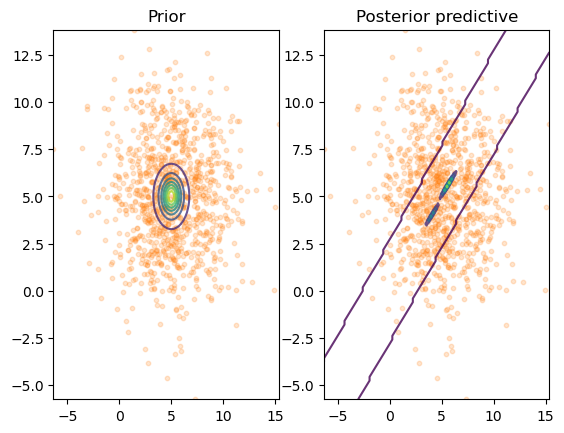

In [6]:
fig, ax = plt.subplots(ncols = 2)

z1 = np.linspace(mv_data[:, 0].min(), mv_data[:, 0].max(), 100)
z2 = np.linspace(mv_data[:, 1].min(), mv_data[:, 1].max(), 100)
x, y = np.meshgrid(z1, z2)
pos = np.dstack((x, y))

ax[0].contour(x, y, stats.multivariate_t.pdf(pos, loc = mean, shape = prior_scale, df = prior_df), alpha = 0.8)
ax[1].contour(x, y, stats.multivariate_t.pdf(pos, loc = mean, shape = post_scale, df = post_df), alpha = 0.8)
ax[0].scatter(mv_data[:, 0], mv_data[:, 1], 10, alpha = 0.2, color = "C1")
ax[1].scatter(mv_data[:, 0], mv_data[:, 1], 10, alpha = 0.2, color = "C1")

ax[0].set_title("Prior")
ax[1].set_title("Posterior predictive")

plt.show();